In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import seaborn as sns
import os 
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
%matplotlib inline 
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
%matplotlib inline


E:\installed anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [4]:
os.chdir('C:\\Users\\user\\Downloads')

# 1.	Import HR_Employee_Attrition_Data.csv

In [5]:
df=pd.read_csv('1452762979_586__HR_Employee_Attrition_Data.csv', na_values=["na"])

In [103]:
df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,3,4,5


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null object
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

# 2.	Target column is “Attrition” column. Convert Yes / No values to 1 / 0

In [6]:
#one hot encoding.
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df = df.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df=pd.get_dummies(df)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 56 columns):
Age                                  2940 non-null int64
Attrition                            2940 non-null int64
DailyRate                            2940 non-null int64
DistanceFromHome                     2940 non-null int64
Education                            2940 non-null int64
EmployeeCount                        2940 non-null int64
EmployeeNumber                       2940 non-null int64
EnvironmentSatisfaction              2940 non-null int64
HourlyRate                           2940 non-null int64
JobInvolvement                       2940 non-null int64
JobLevel                             2940 non-null int64
JobSatisfaction                      2940 non-null int64
MonthlyIncome                        2940 non-null int64
MonthlyRate                          2940 non-null int64
NumCompaniesWorked                   2940 non-null int64
PercentSalaryHike                    2

# hereafter no more categorial data ,it is converted into numeric by one hot encoder.

In [108]:
df.isnull().sum()[ df.isnull().sum() != 0]

Series([], dtype: int64)

# there are no missing values in the data

# outlier treatment

In [101]:
#Getting percentile distribution for all numeric variables
df.quantile([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).T

,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1.0
Age,19.00,24.00,26.0,30.00,36.0,43.00,50.0,54.00,58.61,60.0
DailyRate,117.00,164.00,242.8,465.00,802.0,1157.00,1356.0,1425.00,1485.00,1499.0
DistanceFromHome,1.00,1.00,1.0,2.00,7.0,14.00,23.0,26.00,29.00,29.0
Education,1.00,1.00,1.0,2.00,3.0,4.00,4.0,4.00,5.00,5.0
EmployeeCount,1.00,1.00,1.0,1.00,1.0,1.00,1.0,1.00,1.00,1.0
EmployeeNumber,30.39,147.95,294.9,735.75,1470.5,2205.25,2646.1,2793.05,2910.61,2940.0
EnvironmentSatisfaction,1.00,1.00,1.0,2.00,3.0,4.00,4.0,4.00,4.00,4.0
HourlyRate,30.00,33.00,38.0,48.00,66.0,84.00,94.0,97.00,100.00,100.0
JobInvolvement,1.00,1.00,2.0,2.00,3.0,3.00,3.0,4.00,4.00,4.0
JobLevel,1.00,1.00,1.0,1.00,2.0,3.00,4.0,4.00,5.00,5.0


# there were no outliers in the data set

In [ ]:
sns.pairplot(df,hue = 'Attrition')

E:\installed anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\installed anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\installed anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\installed anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


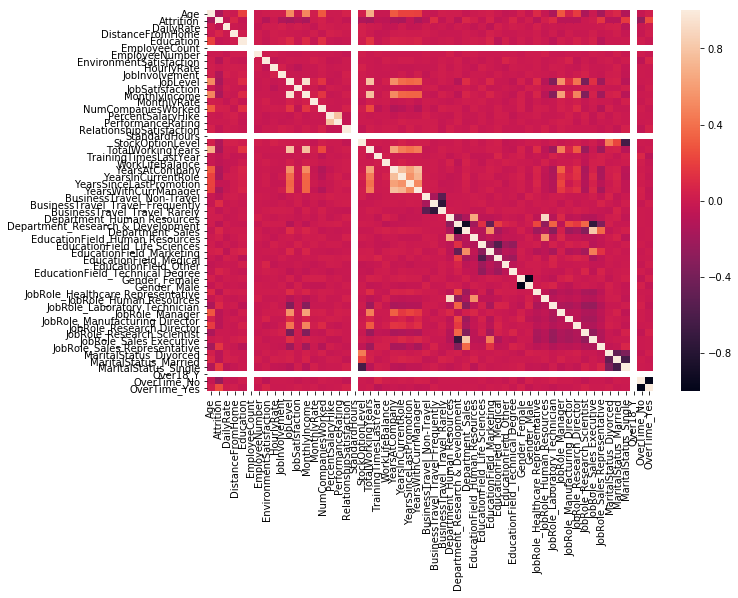

In [7]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

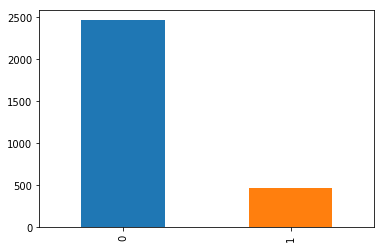

In [106]:
df.Attrition.value_counts().plot(kind='bar')
plt.show()

In [8]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

# 3.	Split file in 70 : 30

In [9]:
from sklearn.cross_validation import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

E:\installed anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 4.	Build AdaBoosting Model
# 5.	Build Random Forest Model
# 6.	Find Important Variables
# 7.	Compare the various Performance Measures


In [10]:
#Boosting Technique with 5 fold
abb= AdaBoostClassifier()
abb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

# if we doesnt given any base estimator ,by default it will take decision tree algoritham as its base estimator

In [11]:
predictValues_test = abb.predict(x_test)
#print(predictValues_validate)
accuracy_test=accuracy_score(y_test, predictValues_test)



predictValues_train = abb.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("test Accuracy  :: ",accuracy_test)



Train Accuracy  ::  0.902332361516035
test Accuracy  ::  0.8650793650793651


In [12]:
from sklearn import metrics
cr= metrics.classification_report(y_train, predictValues_train)
print(cr)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      1740
          1       0.83      0.47      0.60       318

avg / total       0.90      0.90      0.89      2058



In [13]:
cr= metrics.classification_report(y_test, predictValues_test)
print(cr)

             precision    recall  f1-score   support

          0       0.88      0.96      0.92       726
          1       0.70      0.41      0.52       156

avg / total       0.85      0.87      0.85       882



# k-fold cross validation

In [16]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = abb, X = x_train, y = y_train, cv = 5)
accuracies.mean(),accuracies.std()

(0.8887274702950417, 0.008316696100575718)

In [18]:
fpr,tpr,_=roc_curve(y_train, predictValues_train)
roc_auc=auc(fpr,tpr)

Area under curve 0.7237963565387117


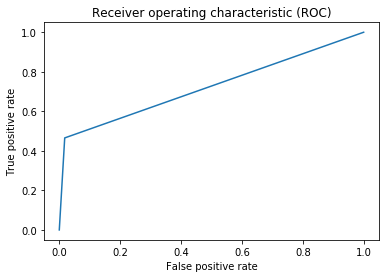

In [20]:
print('Area under curve',roc_auc )
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC)')
plt.show()

In [98]:
RFclassifier = RandomForestClassifier(n_estimators =27, random_state = 0,min_samples_split=5,criterion='entropy',max_depth=12)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
predictValues_test1 = RFclassifier.predict(x_test)
#print(predictValues_validate)
accuracy_test1=accuracy_score(y_test, predictValues_test1)



predictValues_train1 = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train1=accuracy_score(y_train, predictValues_train1)


print("Train Accuracy  :: ",accuracy_train1)
print("test Accuracy  :: ",accuracy_test1)


Train Accuracy  ::  0.9834791059280855
test Accuracy  ::  0.9160997732426304


In [100]:
from sklearn import metrics
cr= metrics.classification_report(y_train, predictValues_train1)
print(cr)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1740
          1       1.00      0.89      0.94       318

avg / total       0.98      0.98      0.98      2058



In [101]:
cr= metrics.classification_report(y_test, predictValues_test1)
print(cr)

             precision    recall  f1-score   support

          0       0.91      0.99      0.95       726
          1       0.96      0.55      0.70       156

avg / total       0.92      0.92      0.91       882



In [102]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RFclassifier, X = x_train, y = y_train, cv = 5)
accuracies.mean(),accuracies.std()


(0.9164068221009615, 0.015508959516129068)

In [103]:
fpr,tpr,_=roc_curve(y_train, predictValues_train1)
roc_auc1=auc(fpr,tpr)

Area under curve 0.9465408805031447


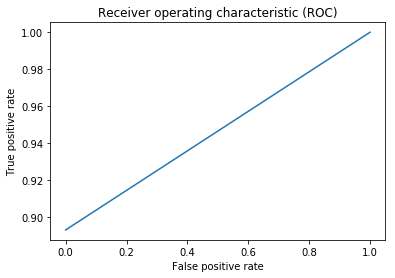

In [104]:
print('Area under curve',roc_auc1)
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC)')
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIFFN(X):
    data_mat = X.as_matrix()
    vif = [variance_inflation_factor(data_mat, i) for i in range(data_mat.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['columns'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [31]:
VIFFN(x)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\installed anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
E:\installed anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,columns,vif
0,Age,2.083275
1,DailyRate,1.035697
2,DistanceFromHome,1.023039
3,Education,1.084006
4,EmployeeCount,0.000000
5,EmployeeNumber,1.008778
6,EnvironmentSatisfaction,1.030233
7,HourlyRate,1.026989
8,JobInvolvement,1.032525
9,JobLevel,14.144402


In [33]:
att=x

In [34]:
att.drop('JobLevel',axis=1,inplace=True)
VIFFN(att)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\installed anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
E:\installed anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,columns,vif
0,Age,2.082876
1,DailyRate,1.035340
2,DistanceFromHome,1.020417
3,Education,1.083812
4,EmployeeCount,0.000000
5,EmployeeNumber,1.008472
6,EnvironmentSatisfaction,1.030171
7,HourlyRate,1.024971
8,JobInvolvement,1.031968
9,JobSatisfaction,1.025258


In [38]:
att.drop('MonthlyIncome',axis=1,inplace=True)
VIFFN(att)

E:\installed anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\installed anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
E:\installed anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,columns,vif
0,Age,2.081341
1,DailyRate,1.034704
2,DistanceFromHome,1.020391
3,Education,1.082994
4,EmployeeCount,0.000000
5,EmployeeNumber,1.008352
6,EnvironmentSatisfaction,1.030123
7,HourlyRate,1.024806
8,JobInvolvement,1.028100
9,JobSatisfaction,1.025253


In [ ]:
#we found 2variables which are highly corelated.
#we can see few attributes has vif as (inf),all that are labels which are encoded by numerical variables.

The top 5 factors that influence the attrition seem to be:

Overtime,
Monthly income,
Job level,
Age,


Number of companies worked for.
Two of these are already familiar to us from our EDA and decision tree plot - it seems that we should indeed do something about those who work overtime and then leave and those who have a low monthly income (which is probably also linked to the job level).

We should also delve a bit more into the matter of age & number of companies the person worked for. Isn't that simply linked to people who retire, and who e.g. probably worked for many companies throughout their life? Or to the fact that we frequently hire freelancers for some temporary positions? If not, what could be wrong there? What policies and/or services are we lacking?

Last but not least, the fact that all three variables linked (directly or indirectly) to work-life balance (distance from home, business travel, and work-life balance as such) have their place among the top 20 variables could also be a sign that something should be done in this area. Remember, we've already observed this pattern during the visualization phase.

We could prioritise and organise an HR audit for each of these areas, just to see what can be improved or what is lacking.

# 8.	Give inferences based on your model output. Suggest Model Implementation Strategy.

# currently from our above models ada booster and random forest we can see that random forest has higher accuracy than ada boosting


# Area under curve 0.7237963565387117 (#ada boosting)

# Area under curve 0.9465408805031447(# random forest)

# ada boosting accuracy rate:
Train Accuracy  ::  0.902332361516035
test Accuracy  ::  0.8650793650793651

# random forest accuracy rate:
Train Accuracy  ::  0.9834791059280855
test Accuracy  ::  0.9160997732426304

random forest with 27 trees and with max_depth of 12 i have obtained the accuracy

hence we prefer to use random forest over ada boosting ,because it has high recall and precison rate and higher accuracy

random forest has high tpr ,fpr and higher auc hence it is prefereed to use random forest.